# Toy Example for Asymmetric SPNI

In [1]:
# Add the parent directory to the path
import sys, os
sys.path.insert(0, os.path.abspath("../.."))

In [2]:
import networkx as nx
import numpy as np
from src.solvers.spnia_asym import AsymmetricSPNI
from src.models.ShortestPathGrb import shortestPathGrb
from src.models.ShortestPathGrid import ShortestPathGrid
from src.solvers.BendersDecomposition import BendersDecomposition

### Create true and estimated network

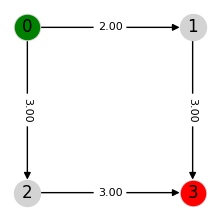

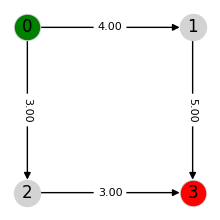

In [3]:
c_true = np.array([2,3,3,3])
grid_true = ShortestPathGrid(m=2, n=2, cost=c_true)
grid_true.visualize()

c_est = np.array([4,3,5,3])
grid_est = ShortestPathGrid(m=2, n=2, cost=c_est)
grid_est.visualize()

In [4]:
d_true = np.array([3,1,4,2])
d_est = np.array([3,1,4,2])
budget = 1

### Interdictor assuming complete evader information

Restricted license - for non-production use only - expires 2026-11-23
Bender's decomposition running:
-------------------------------
Iteration 1: z_max = 9.0, z_min = 5.0
Iteration 2: z_max = 6.0, z_min = 6.0
-------------------------------
Found epsilon-optimal solution after 2 iterations with epsilon = 0.00
-------------------------------
Optimal Solution: obj = 6.0


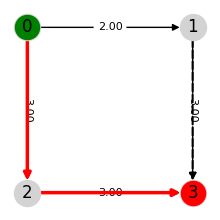

In [5]:
shortest_path_true = shortestPathGrb(grid_true)
benders_true = BendersDecomposition(shortest_path_true, budget, d_true)
x_true, y_true, obj_true = benders_true.solve(versatile=True)
print("-------------------------------\n"+
      f"Optimal Solution: obj = {obj_true}")

### Interdictor knowing asymmetric evader information

In [ ]:

asym_spni = AsymmetricSPNI(grid_true, budget, c_true, d_true, c_est, d_est)
m, x = asym_spni.build_spnia_L()

-------------------------------
Optimal Solution: obj = 8.0


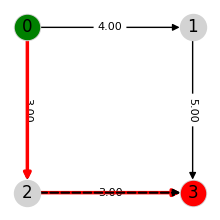

In [15]:
m.optimize()
z_star = m.ObjVal
x_star = [x[e].X for e in asym_spni.G.edges]
shortest_path_est = shortestPathGrb(grid_est)
shortest_path_est.setObj(shortest_path_est.cost + d_est @ x_star)
y_est, obj_est = shortest_path_est.solve()
grid_est.visualize(colored_edges=y_est, dashed_edges=x_star)
print("-------------------------------\n"+
      f"Optimal Solution: obj = {grid_true(y_est, interdictions=x_star * d_true)}")